# Predição de Dengue - Modelos de Classificaao KNN, SVM e Regressão Logística


In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import  pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')
import time as time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


### Ler Arquivos CSV

In [68]:
file='./Dados/Fortaleza/Fortaleza_Inmet_Diario.csv'
#file='../../CSV/INMET/Fortaleza/Fortaleza_InMet_82397.csv'
data = pd.read_csv(file,sep=',')
data = data.rename(columns={'Evaporacao Piche': 'Evaporacao', 'Temp Comp Media': 'TempMedia','Umidade Relativa Media':'Umidade','Velocidade do Vento Media':'VelVento'})
data



,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento
0,82397,01/01/2007,0,NaN,30.6,NaN,8.3,7.3,28.00,74.00,3.971840
1,82397,01/01/2007,1200,0.0,NaN,27.4,NaN,NaN,NaN,NaN,NaN
2,82397,02/01/2007,0,NaN,32.0,NaN,11.3,6.9,28.82,69.50,3.966667
3,82397,02/01/2007,1200,0.0,NaN,27.1,NaN,NaN,NaN,NaN,NaN
4,82397,03/01/2007,0,NaN,29.5,NaN,1.3,8.2,27.24,81.75,2.433333
...,...,...,...,...,...,...,...,...,...,...,...
9667,82397,06/06/2020,1200,0.0,NaN,24.3,NaN,NaN,NaN,NaN,NaN
9668,82397,08/06/2020,0,NaN,31.7,NaN,9.1,NaN,NaN,82.00,NaN
9669,82397,08/06/2020,1200,4.2,NaN,23.3,NaN,NaN,NaN,NaN,NaN
9670,82397,09/06/2020,0,NaN,30.5,NaN,6.4,NaN,NaN,90.00,NaN


### Incluindo colunas Ano e Semana para Agrupamento

In [69]:
#
#data['Data']=pd.to_datetime(data['Data'])
#data['Data']=pd.to_datetime(data['Data'].astype(str), format='%d/%m/%Y')
#data['Ano']=data['Data'].dt.year
#data['Semana']=data['Data'].dt.week
#data

In [70]:
#file2='../../CSV/GISSA_INFECTADOS/infectados_diario_Fortaleza.csv'
file2='./Dados/Fortaleza/Fortaleza_Infectados_Diarios.csv'
data2 = pd.read_csv(file2,sep=',')
data2 = data2.rename(columns={'Data_Notificacao':'Data','Infectados_Dengue':'Infectados'})
data2


,Data,Infectados
0,01/01/2007,6
1,02/01/2007,10
2,03/01/2007,26
3,04/01/2007,20
4,05/01/2007,22
...,...,...
4921,22/06/2020,4
4922,23/06/2020,4
4923,24/06/2020,0
4924,25/06/2020,0


In [71]:
# Incluindo Ano e Semana
#data2['Data']=pd.to_datetime(data2['Data'].astype(str), format='%d/%m/%Y')
#data2['Ano']=data2['Data'].dt.year
#data2['Semana']=data2['Data'].dt.week
#data2

### Verificar dados faltando no dataset Inmet

In [72]:
tot_nulos=data.isnull().sum()
tot_nulos

Estacao            0
Data               0
Hora               0
Precipitacao    4827
TempMaxima      4850
TempMinima      4847
Insolacao       5022
Evaporacao      5495
TempMedia       5045
Umidade         5054
VelVento        4868
dtype: int64

In [73]:
data.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento
0,82397,01/01/2007,0,NaN,30.6,NaN,8.3,7.3,28.00,74.00,3.971840
1,82397,01/01/2007,1200,0.0,NaN,27.4,NaN,NaN,NaN,NaN,NaN
2,82397,02/01/2007,0,NaN,32.0,NaN,11.3,6.9,28.82,69.50,3.966667
3,82397,02/01/2007,1200,0.0,NaN,27.1,NaN,NaN,NaN,NaN,NaN
4,82397,03/01/2007,0,NaN,29.5,NaN,1.3,8.2,27.24,81.75,2.433333


### Os dados diários estão duplicados, pois existem duas medições diáris. Vamos excluir uma das medições

In [74]:
data["Precipitacao"].fillna( method ='backfill', limit = 1, inplace = True) 
data["TempMinima"].fillna( method ='backfill', limit = 1, inplace = True) 
data["TempMaxima"].fillna( method ='backfill', limit = 1, inplace = True) 
data["Insolacao"].fillna( method ='backfill', limit = 1, inplace = True) 
data["Evaporacao"].fillna( method ='backfill', limit = 1, inplace = True) 
data["TempMedia"].fillna( method ='backfill', limit = 1, inplace = True) 
data["Umidade"].fillna( method ='backfill', limit = 1, inplace = True) 
data["VelVento"].fillna( method ='backfill', limit = 1, inplace = True) 

Indices=[x for x in data.index if x%2==1]
data.drop(Indices, inplace=True)
data.reset_index(inplace = True, drop = True)

data

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento
0,82397,01/01/2007,0,0.0,30.6,27.4,8.3,7.3,28.00,74.00,3.971840
1,82397,02/01/2007,0,0.0,32.0,27.1,11.3,6.9,28.82,69.50,3.966667
2,82397,03/01/2007,0,0.5,29.5,25.9,1.3,8.2,27.24,81.75,2.433333
3,82397,04/01/2007,0,7.9,31.3,25.9,11.2,3.1,27.80,71.50,3.166667
4,82397,05/01/2007,0,2.7,28.7,24.0,3.0,5.9,26.52,83.75,3.766667
...,...,...,...,...,...,...,...,...,...,...,...
4831,82397,04/06/2020,0,0.8,31.7,24.7,3.8,NaN,NaN,88.00,NaN
4832,82397,05/06/2020,0,5.4,31.6,23.9,7.3,NaN,NaN,82.00,NaN
4833,82397,06/06/2020,0,0.0,30.8,24.3,8.4,NaN,NaN,84.00,NaN
4834,82397,08/06/2020,0,4.2,31.7,23.3,9.1,NaN,NaN,82.00,NaN


### Verifica novamente se existem nulos

In [75]:
tot_nulos=data.isnull().sum()
tot_nulos

Estacao           0
Data              0
Hora              0
Precipitacao      1
TempMaxima       14
TempMinima       11
Insolacao       186
Evaporacao      659
TempMedia       209
Umidade         218
VelVento         32
dtype: int64

### Estes são nulos de verdade. Vamos substituir pela média

In [76]:
data['Precipitacao'].fillna(data['Precipitacao'].mean(),inplace=True)
data['TempMaxima'].fillna(data['TempMaxima'].mean(),inplace=True)
data['TempMinima'].fillna(data['TempMinima'].mean(),inplace=True)
data['Insolacao'].fillna(data['Insolacao'].mean(),inplace=True)
data['Evaporacao'].fillna(data['Evaporacao'].mean(),inplace=True)
data['TempMedia'].fillna(data['TempMedia'].mean(),inplace=True)
data['Umidade'].fillna(data['Umidade'].mean(),inplace=True)
data['VelVento'].fillna(data['VelVento'].mean(),inplace=True)
tot_nulos=data.isnull().sum()
tot_nulos

Estacao         0
Data            0
Hora            0
Precipitacao    0
TempMaxima      0
TempMinima      0
Insolacao       0
Evaporacao      0
TempMedia       0
Umidade         0
VelVento        0
dtype: int64

### Agrupando dados Metereológicos para Semanais

In [77]:
#dataSemana = data.groupby(by=['Ano','Semana'], as_index=False)['Precipitacao','TempMaxima','TempMinima','Insolacao','Evaporacao','TempMedia',	'Umidade',	'VelVento'].sum()
#dataSemana = data


In [78]:
#dataSemana

### Examina o gráfico dos atributos

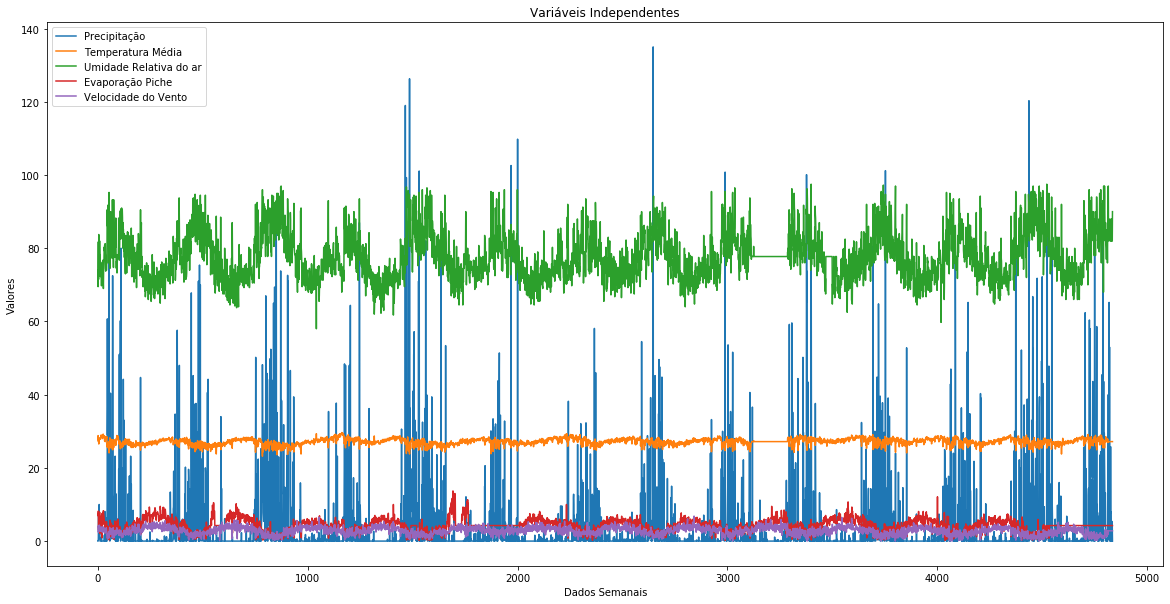

In [79]:

plt.figure(figsize=(20,10))
data.Precipitacao.plot(label="Precipitação")
data.TempMedia.plot( label="Temperatura Média")
data.Umidade.plot( label="Umidade Relativa do ar")
data.Evaporacao.plot( label="Evaporação Piche")
data.VelVento.plot( label="Velocidade do Vento")
plt.title("Variáveis Independentes")
plt.legend()
plt.xlabel('Dados Semanais')
plt.ylabel('Valores')

plt.show()

### Verifica Nulos da variável dependente - N. de infectados.

In [80]:
tot_nulos=data2.isnull().sum()
tot_nulos

Data          0
Infectados    0
dtype: int64

In [81]:
data2

,Data,Infectados
0,01/01/2007,6
1,02/01/2007,10
2,03/01/2007,26
3,04/01/2007,20
4,05/01/2007,22
...,...,...
4921,22/06/2020,4
4922,23/06/2020,4
4923,24/06/2020,0
4924,25/06/2020,0


### Agrupar  por semana e plota o gráfico da variável dependente

In [82]:
#data2Semana = data2.groupby(by=['Ano','Semana'], as_index=False).sum()
#for col_name in data2Semana:
#    print(col_name)
#data2Semana=data2

In [83]:
data2.describe()

,Infectados
count,4926.000000
mean,55.572067
std,116.713233
min,0.000000
25%,7.000000
50%,18.000000
75%,50.000000
max,1249.000000


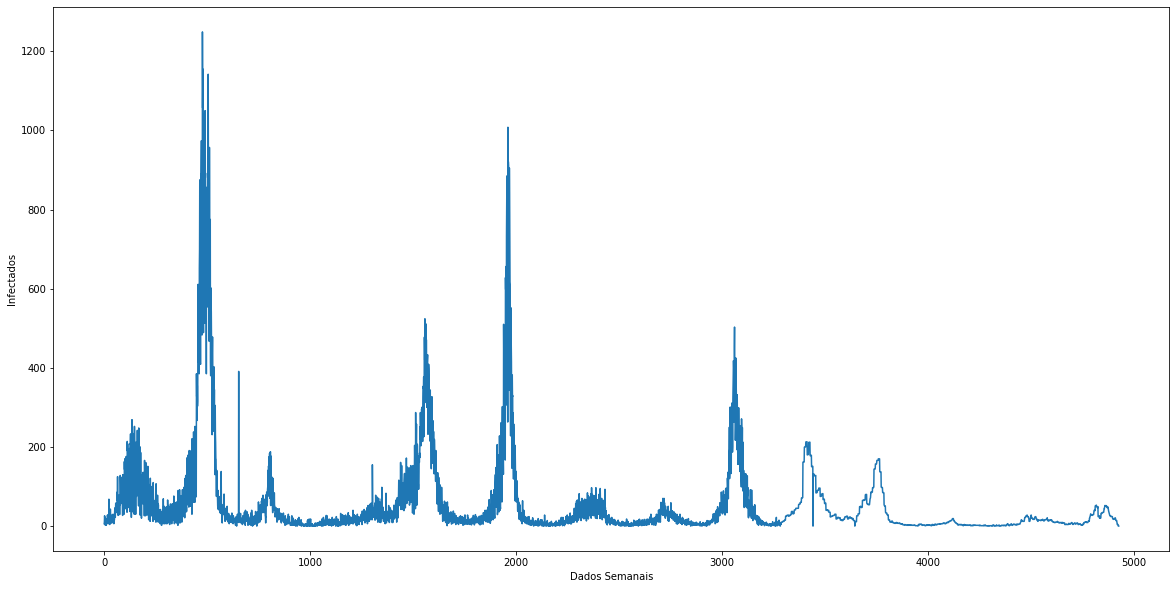

In [84]:
# Analisar dados de "Infectados" ao longo do tempo
plt.figure(figsize=(20,10))
plt.xlabel('Dados Semanais')
plt.ylabel('Infectados')
plt.plot(data2['Infectados'])
plt.show()

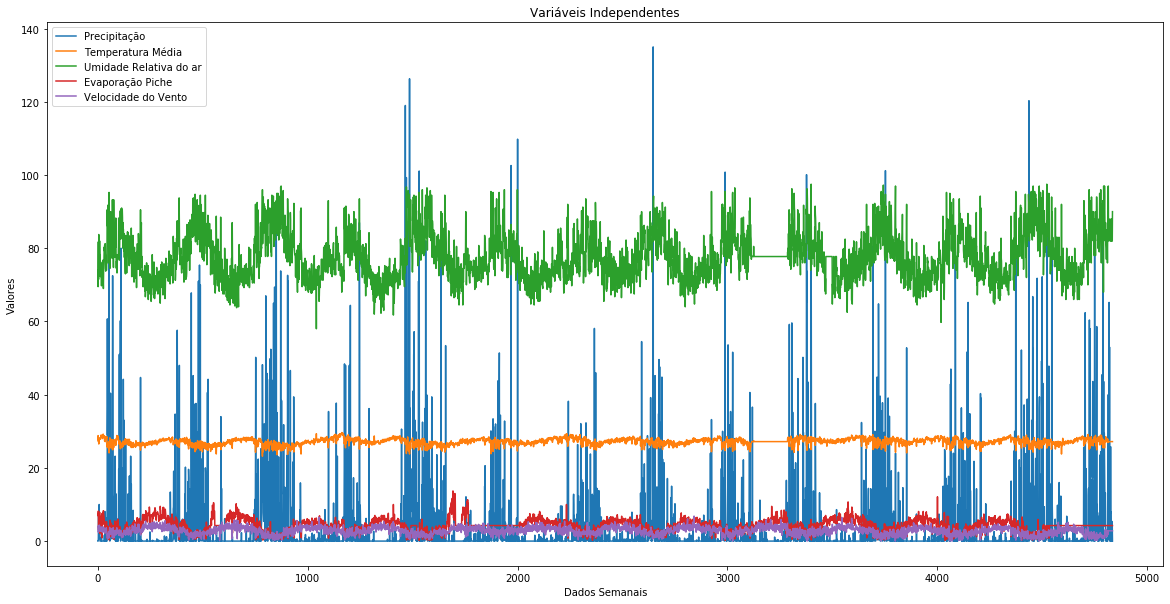

In [85]:
plt.figure(figsize=(20,10))
data.Precipitacao.plot(label="Precipitação")
data.TempMedia.plot( label="Temperatura Média")
data.Umidade.plot( label="Umidade Relativa do ar")
data.Evaporacao.plot( label="Evaporação Piche")
data.VelVento.plot( label="Velocidade do Vento")
plt.title("Variáveis Independentes")
plt.legend()
plt.xlabel('Dados Semanais')
plt.ylabel('Valores')

plt.show()

### Separando dados para treino e teste

In [97]:
X_train = data[(pd.DatetimeIndex(data['Data']).year>=2007) & (pd.DatetimeIndex(data['Data']).year<=2015)] 
X_test = data[(pd.DatetimeIndex(data['Data']).year>=2016)] 
y_train = data2[(pd.DatetimeIndex(data2['Data']).year>=2007) & (pd.DatetimeIndex(data2['Data']).year<=2015)]
submission = data2[(pd.DatetimeIndex(data2['Data']).year>=2016)] 

submission

,Data,Infectados
3287,01/01/2016,9
3288,02/01/2016,10
3289,03/01/2016,10
3290,04/01/2016,10
3291,05/01/2016,10
...,...,...
4921,22/06/2020,4
4922,23/06/2020,4
4923,24/06/2020,0
4924,25/06/2020,0


### Normalizador estatístico, onde o resultado da normalização garante média zero e variância/desvio parão unitária.

In [98]:
normalizador = StandardScaler()

X_train.iloc[:,2:] = normalizador.fit_transform(X_train.iloc[:,2:])
X_test.iloc[:,2:] = normalizador.transform(X_test.iloc[:,2:])
X_train,X_test,y_train

(      Estacao        Data  Hora  Precipitacao  TempMaxima  TempMinima  \
 0       82397  01/01/2007   0.0     -0.351380   -0.651733    3.082668   
 1       82397  02/01/2007   0.0     -0.351380    0.615440    2.823220   
 2       82397  03/01/2007   0.0     -0.307663   -1.647370    1.785430   
 3       82397  04/01/2007   0.0      0.339360   -0.018147    1.785430   
 4       82397  05/01/2007   0.0     -0.115305   -2.371469    0.142263   
 ...       ...         ...   ...           ...         ...         ...   
 3282    82397  27/12/2015   0.0     -0.351380    0.524928    1.093570   
 3283    82397  28/12/2015   0.0      0.575435   -0.742246   -0.636079   
 3284    82397  29/12/2015   0.0     -0.351380    1.792101    0.055781   
 3285    82397  30/12/2015   0.0     -0.351380    1.339539    1.698948   
 3286    82397  31/12/2015   0.0     -0.351380    0.796465    1.785430   
 
       Insolacao  Evaporacao  TempMedia   Umidade  VelVento  
 0      0.149667    1.666074   1.046063 -0.53479

Nossa variável de destino, "Infectados" é um número inteiro não negativo, o que significa que estamos procurando fazer algumas previsões de contagem. As técnicas de regressão padrão para esse tipo de previsão incluem:
Regressão de Poisson
Regressão binomial negativa.

Qual técnica terá melhor desempenho depende de muitas coisas, mas a escolha entre a regressão de Poisson e a regressão binomial negativa é bastante direta.

A regressão de Poisson se ajusta de acordo com a suposição de que a média e a variância da distribuição da população são iguais. Quando não são, especificamente quando a variação é muito maior que a média, a abordagem binomial negativa é melhor.

A regressão binomial negativa simplesmente levanta a suposição de que a média e variância da população são iguais, permitindo uma classe maior de modelos possíveis. De fato, dessa perspectiva, a distribuição de Poisson é apenas um caso especial da distribuição binomial negativa.

In [99]:
y_train.describe()

,Infectados
count,3287.000000
mean,69.514755
std,137.757619
min,0.000000
25%,9.000000
50%,22.000000
75%,60.000000
max,1249.000000


In [102]:
print('Media e Variancia dos Infectados')
print('mean: ', y_train.mean()[0])
print('std :', y_train.std()[0])
print('var :', y_train.var()[0])

Media e Variancia dos Infectados
mean:  69.51475509583207
std : 137.75761904557498
var : 18977.161605105764


Variancia maior que media sugere que a variável "Infectados" pode ser descrita por uma distribuição binomial negativa; portanto, usaremos uma regressão binomial negativa abaixo. 

Vamos analisar as Correlações


In [103]:
X_corr = X_train[['Precipitacao','Insolacao','Evaporacao','TempMinima','TempMaxima','TempMedia','Umidade','VelVento']]
X_corr


,Precipitacao,Insolacao,Evaporacao,TempMinima,TempMaxima,TempMedia,Umidade,VelVento
0,-0.351380,0.149667,1.666074,3.082668,-0.651733,1.046063,-0.534797,1.041181
1,-0.351380,1.148162,1.444084,2.823220,0.615440,2.001832,-1.260535,1.035971
2,-0.307663,-2.180156,2.165551,1.785430,-1.647370,0.160229,0.715086,-0.508313
3,0.339360,1.114879,-0.664821,1.785430,-0.018147,0.812949,-0.937985,0.230258
4,-0.115305,-1.614342,0.889109,0.142263,-2.371469,-0.678983,1.037636,0.834543
...,...,...,...,...,...,...,...,...
3282,-0.351380,-0.045502,0.778114,1.093570,0.524928,0.085846,0.067514,-0.038314
3283,0.575435,-0.045502,1.000104,-0.636079,-0.742246,0.085846,0.067514,-1.901525
3284,-0.351380,-0.045502,-0.609323,0.055781,1.792101,0.085846,0.067514,0.012044
3285,-0.351380,-0.045502,1.222094,1.698948,1.339539,0.085846,0.067514,0.918471


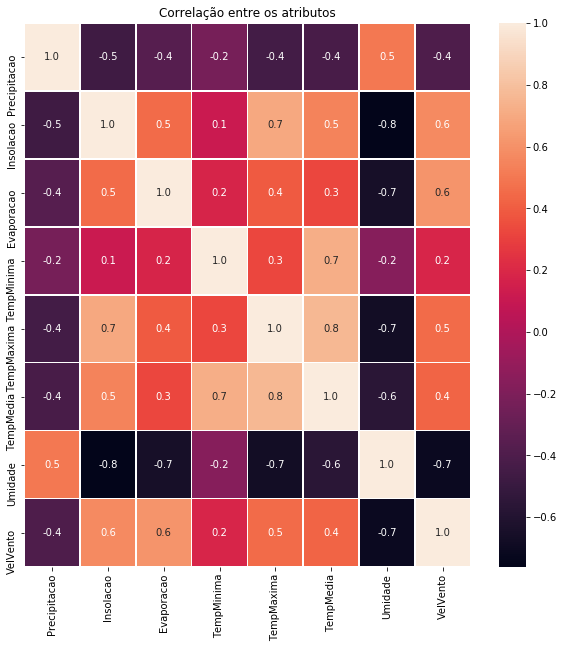

In [104]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_corr.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlação entre os atributos')
plt.show()


Text(0.5, 1.0, 'Correlações')

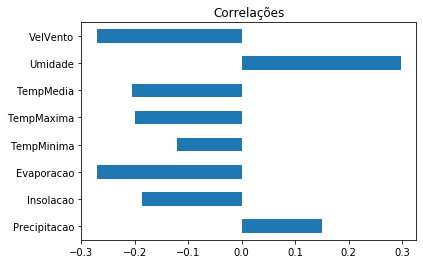

In [106]:
X_corr.corrwith(y_corr,axis=0).plot.barh()
plt.title('Correlações com o N. de Infectados')

### Verificamos que a Precipitação, Umidade e Vel. do Vento são as que têm mais forte correlação com o N. de Infectados

### Vamos plotar o número de infectados para cada ano

In [112]:
#Plota Infectados por ano
#for i in set(y_train['Ano']):
#    df = y_train[y_train['Ano'] == i]
#    df.set_index('Semana', drop = True, inplace = True)
#    plt.plot(df['Infectados'], alpha = .3)
    
#y_train.groupby('Semana')['Infectados'].mean().plot(c = 'k', figsize = (10,4))
#plt.legend(set(y_train['Ano']), loc='center left', bbox_to_anchor=(1, .5))

#plt.title('Número de casos por ano  ')
#plt.xlabel('Semana do ano')
#plt.ylabel('Total de Infectados')

###  Verificas uma incidência maior de dengue no final do primeiro semestre, que coincide com o final do período chuvoso no Ceará

## Construindo modelos de Machine Learning
### Agora que temos uma compreensão mais clara do nosso conjunto de dados, continuaremos a construir nossos modelos de ML.


In [66]:
#features=['Infectados','Precipitacao','Insolacao','Evaporacao','TempMedia','Umidade','VelVento'] 

#X_train=X_train.join(X_train.groupby(['Semana'])['Infectados'].mean(), on=['Semana'], rsuffix='_avg')
#X_test=X_test.join(X_train.groupby(['Semana'])['Infectados'].mean(), on=['Semana'], rsuffix='_avg')

#TRAIN
#X= X_train[features]
#Y = X_train['Infectados']

#TEST
#Xt= X_test[features]

#X.fillna(method='bfill', inplace=True)
#Xt.fillna(method='bfill', inplace=True)


## Criando os modelos e treinando 

In [127]:
features=['TempMedia','TempMinima','TempMaxima','Precipitacao','Insolacao','Evaporacao','Umidade','VelVento'] 
X=X_train[features]
Y=y_train['Infectados']
Xt=X_test[features]

X.fillna(method='bfill', inplace=True)
Xt.fillna(method='bfill', inplace=True)

### SVM - (Support Vetor Machine / SRV - Support vetor Regression)

In [128]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
t0 = time.time()
svr.fit(X,Y)

svr_fit = time.time() - t0
print("Complexidade SVR e largura de banda selecionadas e modelo ajustado em %.3f s"
      % svr_fit)
model_SVR=svr.best_estimator_
print(model)


Complexidade SVR e largura de banda selecionadas e modelo ajustado em 73.057 s
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1.0,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


###   KNN (k-nearest neighbors )

In [129]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X,Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

### Regressão Logística

In [130]:
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Separa dados de treino (70%)  e teste (30%) Para VALIDAÇÃO

In [131]:
train_subtrain = X_train.sample(frac=0.7)
train_subtest = X_train.loc[~X_train.index.isin(train_subtrain.index)]

train_subtrain.fillna(method='bfill', inplace=True)
train_subtest.fillna(method='bfill', inplace=True)

#X_train.describe()
train_subtest.describe()


,Estacao,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento
count,986.0,986.0,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,82397.0,0.0,0.017081,0.017012,0.002014,0.005917,0.007962,0.002234,0.006136,0.023119
std,0.0,0.0,0.981112,0.988120,1.008896,1.002876,1.006777,1.002190,1.010990,1.059886
min,82397.0,0.0,-0.351380,-4.815304,-3.144071,-2.612837,-2.274248,-3.989207,-3.115200,-2.724024
25%,82397.0,0.0,-0.351380,-0.470709,-0.722562,-0.382864,-0.609323,-0.585737,-0.736391,-0.676169
50%,82397.0,0.0,-0.351380,0.162878,-0.030702,0.415932,-0.030685,0.085846,-0.050971,0.062401
75%,82397.0,0.0,-0.159022,0.615440,0.747641,0.715480,0.611621,0.713875,0.634448,0.767400
max,82397.0,0.0,10.053439,2.968763,3.342115,1.181445,4.829430,2.607929,3.093895,3.923109


### Cria Predições

In [132]:
pred_SVR= model_SVR.predict(train_subtest[features]).astype(int)
#SVM
#add to the dataframes
train_subtest['SVR'] = pred_SVR

# KNN
pred_KNN = knn.predict(train_subtest[features]).astype(int)
train_subtest['KNN'] = pred_KNN
#train_subtest.index = train_subtest['week_start_date']

# Logistic regression
pred_RegLog = logreg.predict(train_subtest[features]).astype(int)
train_subtest['RegLog'] = pred_RegLog
#train_subtest.index = train_subtest['week_start_date']


In [133]:
train_subtest

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao,TempMedia,Umidade,VelVento,SVR,KNN,RegLog
1,82397,02/01/2007,0.0,-0.351380,0.615440,2.823220,1.148162,1.444084,2.001832,-1.260535,1.035971,22,5,5
6,82397,07/01/2007,0.0,0.522974,-0.108659,1.007088,-0.016749,1.499581,0.579834,0.795723,0.565971,23,2,2
7,82397,08/01/2007,0.0,-0.211484,0.705953,1.093570,0.549065,0.556124,1.185932,-0.333203,1.405256,7,0,6
8,82397,09/01/2007,0.0,0.173232,-0.108659,1.785430,-1.048528,1.999058,0.743014,0.755404,-0.172599,25,2,5
10,82397,11/01/2007,0.0,-0.351380,0.434415,1.266535,-0.249732,0.778114,1.022752,0.150623,0.095972,16,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,82397,16/12/2015,0.0,-0.351380,1.430052,1.525983,-0.045502,1.111099,0.085846,0.067514,0.515614,14,3,5
3274,82397,19/12/2015,0.0,-0.281432,1.068002,1.698948,-0.045502,0.611621,0.085846,0.067514,1.875255,18,5,5
3276,82397,21/12/2015,0.0,-0.333893,0.977490,0.574676,-0.045502,1.055601,0.085846,0.067514,1.774541,14,3,6
3280,82397,25/12/2015,0.0,0.365590,0.977490,-0.463114,-0.045502,-1.275293,0.085846,0.067514,-0.038314,31,30,10


### Plotagem das predições com parte de dados de teste (30%)

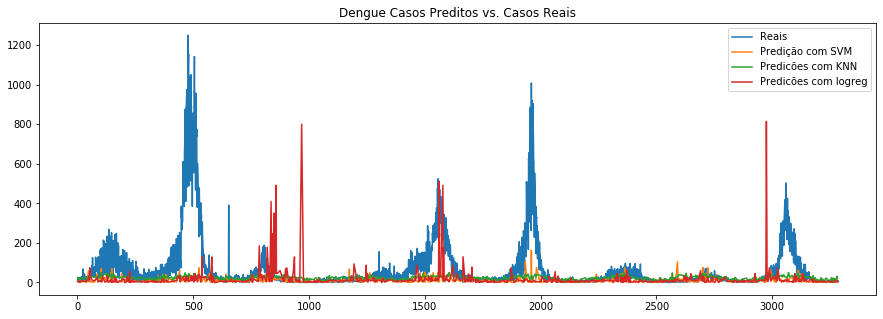

In [156]:
plt.figure(figsize=(15,5))
y_train.Infectados.plot(label="Reais")
train_subtest.KNN.plot( label="Predição com SVM")
train_subtest.SVR.plot( label="Predicões com KNN")
train_subtest.RegLog.plot( label="Predicões com logreg")
plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()


## Calcula as métricas  - Cross validation com o score R2 - Para os dados de Teste

### Scores para SVR

In [138]:
scores = cross_val_score(svr, X,Y, cv=5, scoring = "r2")
print("Scores usando SVR:", scores)
print("Média  usando SVR:", scores.mean())

Scores usando SVR: [-0.25904965 -0.05014651 -0.27126511  0.08726921 -0.01525226]
Média  usando SVR: -0.10168886426957162


### Scores para KNN

In [139]:
scores = cross_val_score(knn, X,Y, cv=5, scoring = "r2")
print("Scores usando KNN:", scores)
print("Média  usando KNN:", scores.mean())

Scores usando KNN: [-0.19786094 -0.16691095 -0.16670041 -0.1571803  -0.17877862]
Média  usando KNN: -0.17348624297309861


### Scores para Regressão Logística

In [140]:
scores = cross_val_score(logreg, X,Y, cv=5, scoring = "r2")
print("Scores usando Reg. Logística:", scores)
print("Média usando Reg. Logística:", scores.mean())

Scores usando Reg. Logística: [-0.27046314 -0.43191679 -0.25723948 -0.23550634 -0.19736863]
Média usando Reg. Logística: -0.278498874870246


### Podemos afirmar, de acordo com os scores, que SVR e Reg. Logística fornecem bons resultados

## Fazendo predições com dados de teste para cada algoritmo

### Predição KNN

In [147]:
Xt, submission

(      TempMedia  TempMinima  TempMaxima  Precipitacao  Insolacao  Evaporacao  \
 3287   1.185932    1.525983    0.072366     -0.351380  -0.915395    0.556124   
 3288   1.162620    1.353018    0.705953     -0.351380   0.648914   -0.165343   
 3289   1.488980    1.266535    1.158515     -0.351380   0.615631    0.223139   
 3290   1.442357    1.353018    0.796465     -0.351380   0.449215    0.167642   
 3291   1.232554    1.525983    0.977490     -0.176509   0.382649    0.223139   
 ...         ...         ...         ...           ...        ...         ...   
 4831   0.085846    0.747641    0.343903     -0.281432  -1.348076   -0.030685   
 4832   0.085846    0.055781    0.253391      0.120771  -0.183165   -0.030685   
 4833   0.085846    0.401711   -0.470709     -0.351380   0.182950   -0.030685   
 4834   0.085846   -0.463114    0.343903      0.015849   0.415932   -0.030685   
 4835   0.085846   -0.117184   -0.742246     -0.351380  -0.482714   -0.030685   
 
        Umidade  VelVento 

In [142]:
knn.fit(X,Y)
predictions = knn.predict(Xt).astype(int)
submission.Infectados = np.concatenate([predictions])

plt.figure(figsize=(20,10))
Y_train.Infectados.plot(label="Reais")

submission.Infectados.plot( label="Predicões com KNN")

plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()

ValueError: Length of values does not match length of index

### Predição SVM

In [ ]:
#Predição SVM

model.fit(X,Y)
predictions2 = model.predict(Xt).astype(int)

submission.Infectados = np.concatenate([predictions2])

plt.figure(figsize=(20,10))
X_test.Infectados.plot(label="Reais")
submission.Infectados.plot( label="Predição com SVM")
plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()

### Predição Regressão Logística

In [ ]:

logreg.fit(X,Y)
predictions3 = logreg.predict(Xt).astype(int)

submission.Infectados = np.concatenate([predictions3])


plt.figure(figsize=(20,10))
X_test.Infectados.plot(label="Reais")

submission.Infectados.plot( label="Regressão Logistica")
plt.title("Dengue Casos Preditos vs. Casos Reais")
plt.legend()

### Concluimos que os modelos baseados em SVM e Regressão logística funcionam muito bem para previsão de casos dengue